[[5.07793064]]
0.8782624703664671


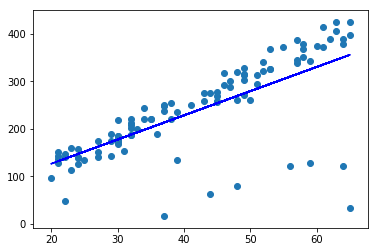

test3
test2
test


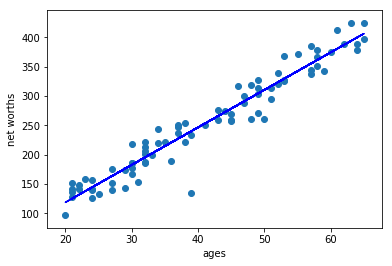

[[6.38302395]]
0.9836232197314149


In [22]:
# %load outlier_removal_regression.py
#!/usr/bin/python

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    print 'test3'
    cleaned_data = []

    ### your code goes here
    
    list1 = []
    for i in range(len(predictions)):
        error = abs(predictions[i][0] - net_worths[i][0])
        list1.append(tuple((ages[i][0],net_worths[i][0],error)))
    
    list1.sort(key=lambda x: x[2],reverse=True)  
    #sorted(list1, key=lambda x: x[2],reverse=True)
    
    leng = len(predictions)/10
    
    cleaned_data = list1[leng-1:]
    print 'test2'
    return cleaned_data


import random
import numpy
import matplotlib.pyplot as plt
import pickle
%matplotlib inline  

#from outlier_cleaner import outlierCleaner



### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like


from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)

print reg.coef_

print reg.score(ages_test,net_worths_test)

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
    print 'test'
    #print predictions
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

    
    
print reg.coef_
print reg.score(ages_test,net_worths_test)


In [11]:
leng = 90/10
leng

9

In [3]:
# %load outlier_cleaner.py
#!/usr/bin/python


def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    
    list1 = []
    for i in len(predictions):
        error = abs(predictions[i][0] - net_worths[i][0])
        list1.append(tuple((ages[i][0],net_worth[i][0],error)))
    
    sorted(list1, key=lambda x: x[2],reverse=True)
    
    leng = len(predictions)/10
    
    cleaned_data = list1[leng-1:]
    
    return cleaned_data



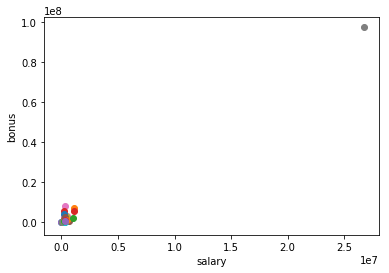

TOTAL 26704229


Text(0,0.5,'bonus')

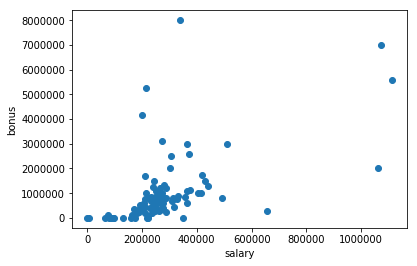

In [49]:
# %load enron_outliers.py
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
%matplotlib inline
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]

data = featureFormat(data_dict, features)


### your code below



for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

#print data.shape


salary = 0
name = []
data_keys = data_dict.keys()
data_values = data_dict.values()
#print data_keys
#print len(data_keys)
for i in range(len(data_keys)):
    if data_values[i]["salary"] > salary and data_values[i]["salary"] <> 'NaN':
        name = data_keys[i]
        salary = data_values[i]["salary"]

print name, salary

#for i in range(len(data_keys)):
#    if data_values[i]['salary']<>'NaN' and data_values[i]['bonus']<>'NaN':
#        if data_values[i]['salary']==max(data,key=lambda x: x[0])[0] and data_values[i]['bonus']==max(data,key=lambda x: x[0])[1]:
#            print data_keys[i]    #the outlier key


data_dict.pop('TOTAL',0)

data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

#plt.scatter(data[:,0], data[:,1])
#plt.xlabel("salary")
#plt.ylabel("bonus")

In [53]:
list1 = []
#salary = []
#name = []
#bonus = []
data_keys = data_dict.keys()
data_values = data_dict.values()
#print data_keys
#print len(data_keys)
for i in range(len(data_keys)):
    if data_values[i]["salary"] > 1000000 and data_values[i]["salary"] <> 'NaN':
        if data_values[i]["bonus"] > 5000000 and data_values[i]["bonus"] <> 'NaN':
            #name.append(data_keys[i])
            #salary.append(data_values[i]["salary"])
            #bonus.append(data_values[i]["bonus"])
            list1.append([data_keys[i],data_values[i]["salary"],data_values[i]["bonus"]])

print list1

[['LAY KENNETH L', 1072321, 7000000], ['SKILLING JEFFREY K', 1111258, 5600000]]
